# 🎮 Gaming BI Project – Exploratory Data Analysis

In this project, we analyzed video game sales data across all platforms and regions.  
The data was cleaned and transformed using Power Query, stored in a SQL Server database, and analyzed using Python.  
The goal of the analysis is to uncover key trends such as:  
- Which years had the highest global sales  
- Which genres were the most popular  
- Which consoles generated the most revenue  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

file_path = r'C:\GamingBIP\Excel\RawData.csv'
df = pd.read_csv(file_path)

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['Year'] = df['release_date'].dt.year

clean_df = df[df['Year'].notnull()]


C:\Users\ebtom\AppData\Local\Temp\ipykernel_16812\1309625271.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='total_sales', data=top_years, palette='viridis')


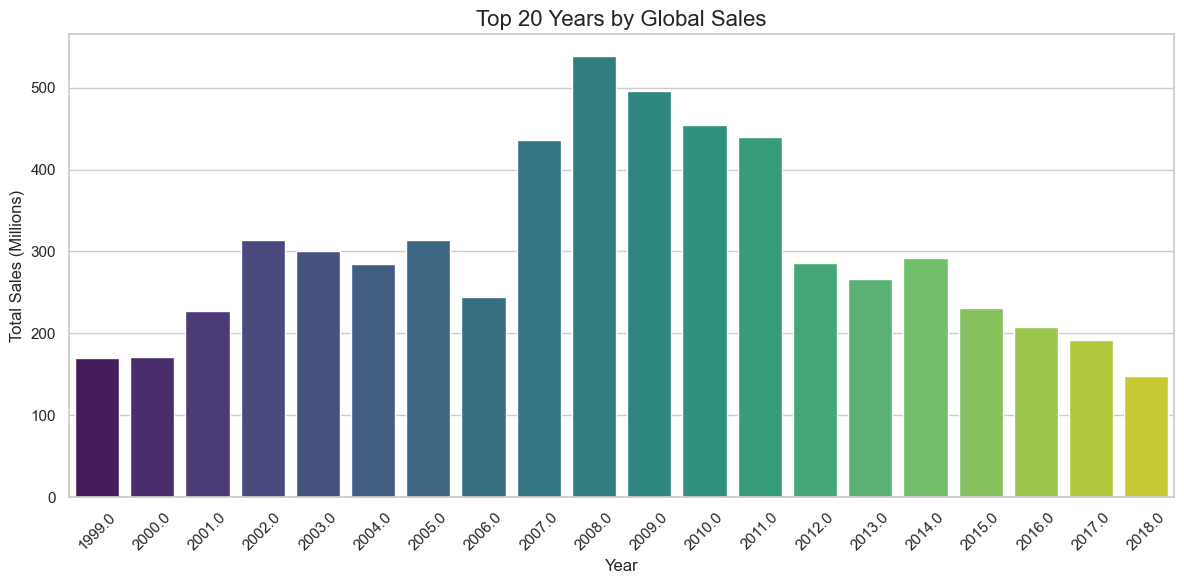

In [13]:

sales_by_year = clean_df.groupby('Year')['total_sales'].sum().reset_index()

top_years = sales_by_year.sort_values(by='total_sales', ascending=False).head(20)

top_years = top_years.sort_values(by='Year')

plt.figure(figsize=(12,6))
sns.barplot(x='Year', y='total_sales', data=top_years, palette='viridis')
plt.title('Top 20 Years by Global Sales', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\ebtom\AppData\Local\Temp\ipykernel_16812\3146159338.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='genre', data=top_genres, palette='magma')


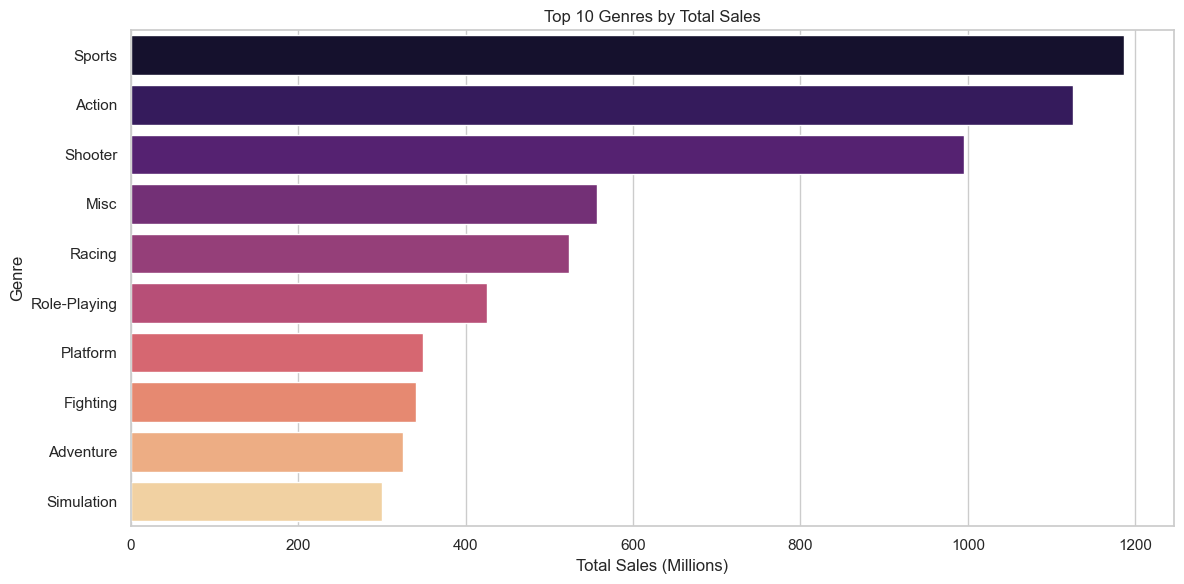

In [14]:
sales_by_genre = clean_df.groupby('genre')['total_sales'].sum().reset_index()
top_genres = sales_by_genre.sort_values(by='total_sales', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='total_sales', y='genre', data=top_genres, palette='magma')
plt.title('Top 10 Genres by Total Sales')
plt.xlabel('Total Sales (Millions)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


C:\Users\ebtom\AppData\Local\Temp\ipykernel_16812\1632250646.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='console', data=top_consoles, palette='crest')


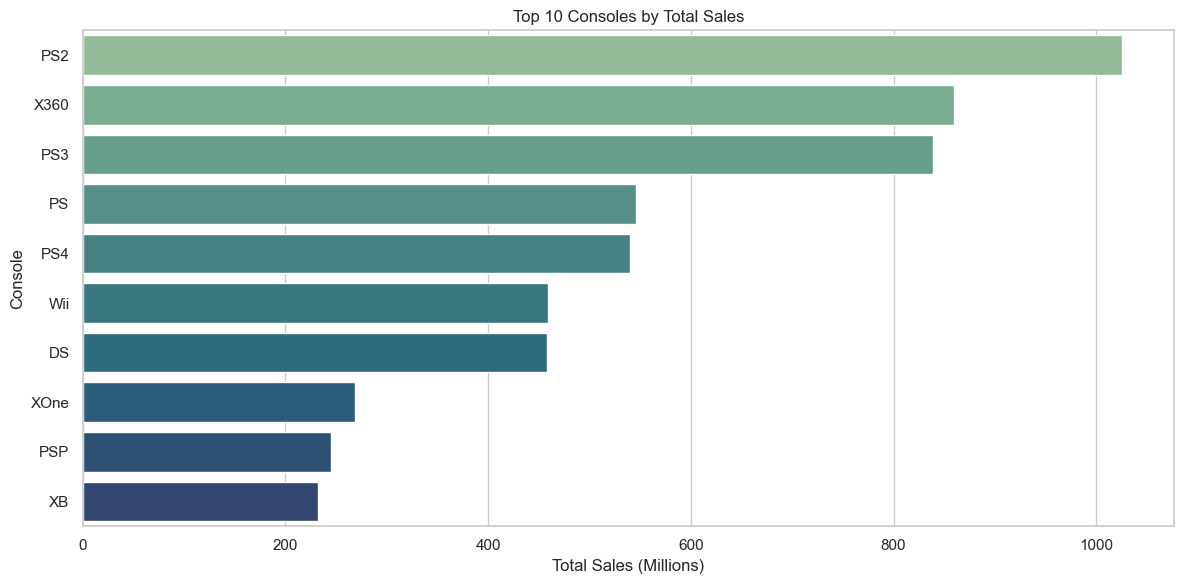

In [15]:
sales_by_console = clean_df.groupby('console')['total_sales'].sum().reset_index()
top_consoles = sales_by_console.sort_values(by='total_sales', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='total_sales', y='console', data=top_consoles, palette='crest')
plt.title('Top 10 Consoles by Total Sales')
plt.xlabel('Total Sales (Millions)')
plt.ylabel('Console')
plt.tight_layout()
plt.show()


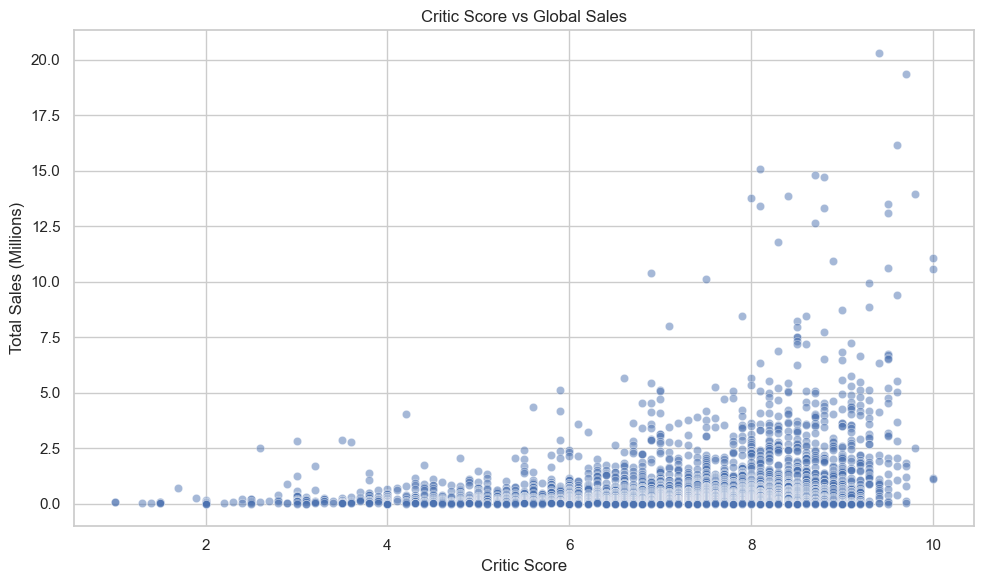

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=clean_df, x='critic_score', y='total_sales', alpha=0.5)
plt.title('Critic Score vs Global Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (Millions)')
plt.tight_layout()
plt.show()
